In [18]:
import pandas as pd
import numpy as np
import subprocess
import os
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="whitegrid")

# Data Preparation Confirmed Cases

focus is always to understand the final data structure
support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [19]:
data_path=r'..\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [20]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [21]:

git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()

In [22]:
time_idx=pd_raw.columns[4:]

In [23]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [24]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


# Displays list of countries

In [25]:

pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

# Slicing data of the required countries

In [26]:

pd_raw[pd_raw['Country/Region']=='Bhutan'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [27]:
country_list=['Bhutan', 'Denmark', 'Finland']
              

In [28]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [29]:
df_plot.head()

,date,Bhutan,Denmark,Finland
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


# Dividing confirmed cases with country population

In [30]:

df_plot['Bhutan'] = df_plot['Bhutan'].div(771612)
df_plot['Denmark'] = df_plot['Denmark'].div(5831000)
df_plot['Finland'] = df_plot['Finland'].div(5531000)


In [31]:
df_plot

,date,Bhutan,Denmark,Finland
0,1/22/20,0.000000,0.000000,0.000000
1,1/23/20,0.000000,0.000000,0.000000
2,1/24/20,0.000000,0.000000,0.000000
3,1/25/20,0.000000,0.000000,0.000000
4,1/26/20,0.000000,0.000000,0.000000
...,...,...,...,...
878,6/18/22,0.077298,0.548316,0.203461
879,6/19/22,0.077298,0.548316,0.203461
880,6/20/22,0.077337,0.548870,0.203461
881,6/21/22,0.077337,0.549237,0.203461


# Plotting of the data

Text(0, 0.5, 'Confirmed Cases')

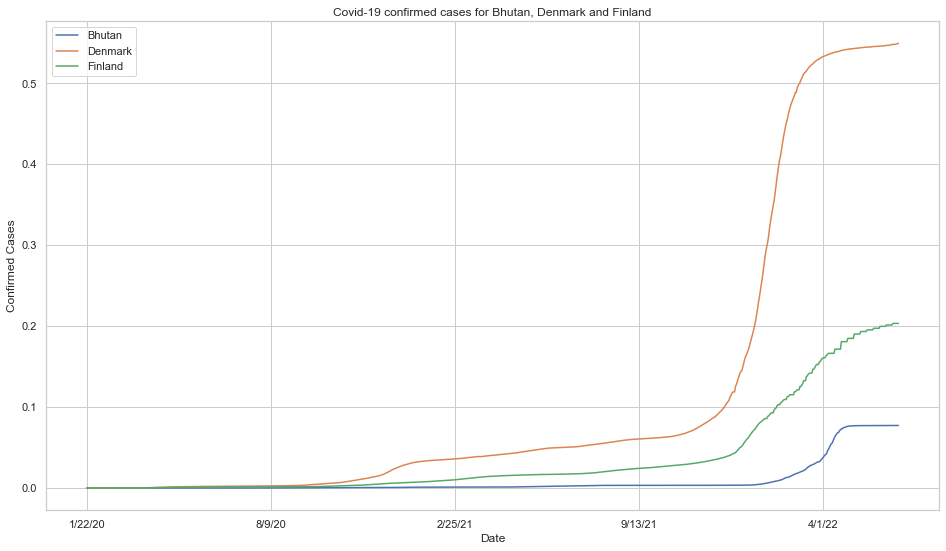

In [32]:

final_plot=df_plot.set_index('date').plot(title='Covid-19 confirmed cases for Bhutan, Denmark and Finland')
final_plot.set_xlabel("Date")
final_plot.set_ylabel("Confirmed Cases")